# Bus breakdown data and delay for school buses in new york city from 2015 to 2017 from kaggle 

https://www.kaggle.com/anthobau/busbreakdownanddelays

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [28]:
df1=pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [29]:
colsToDrop = ['Run_Type', 'Bus_No', 'Route_Number', 'Schools_Serviced','Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']
df=df1.drop(colsToDrop, axis=1)

# Selecting  only few columns to analyse pattern in bus breakdown time

In [30]:
df.head(3)

,School_Year,Busbreakdown_ID,Reason,Occurred_On
0,2015-2016,1224901,Other,10/26/2015 08:30:00 AM
1,2015-2016,1225098,Heavy Traffic,10/27/2015 07:10:00 AM
2,2015-2016,1215800,Heavy Traffic,09/18/2015 07:36:00 AM


In [6]:
#find unique reasons for bus breakdown
df['Reason'].nunique()

10

In [7]:
#Counts of reason for breakdown
df['Reason'].value_counts()

Heavy Traffic                  87426
Other                          21768
Mechanical Problem             13908
Won`t Start                     7277
Flat Tire                       4585
Weather Conditions              4527
Late return from Field Trip     3464
Problem Run                     2204
Delayed by School               1446
Accident                        1367
Name: Reason, dtype: int64

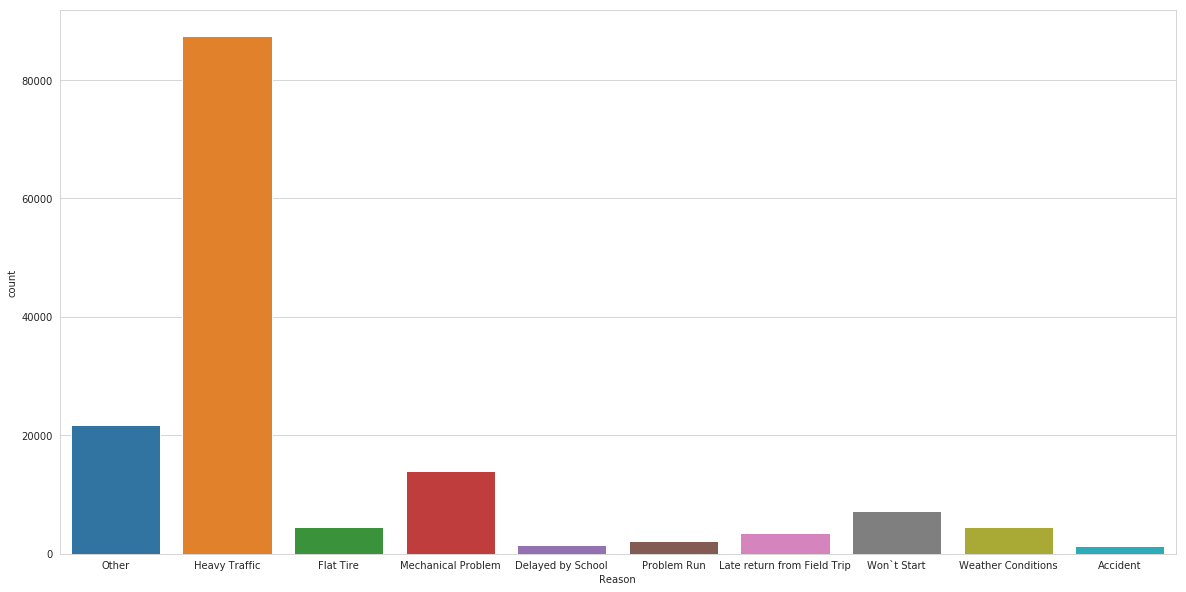

In [16]:
#countplot of reasons for breakdown
plt.figure(figsize=(20, 10))
sns.countplot(x='Reason',data=df)


# Converting occured on time into day,hour,month columns 

In [31]:
df['timeStamp']=pd.to_datetime(df['Occurred_On'])

In [33]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [35]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Text(0.5,1,'Bus Breakdown count on each Day of Week divided by Reason')

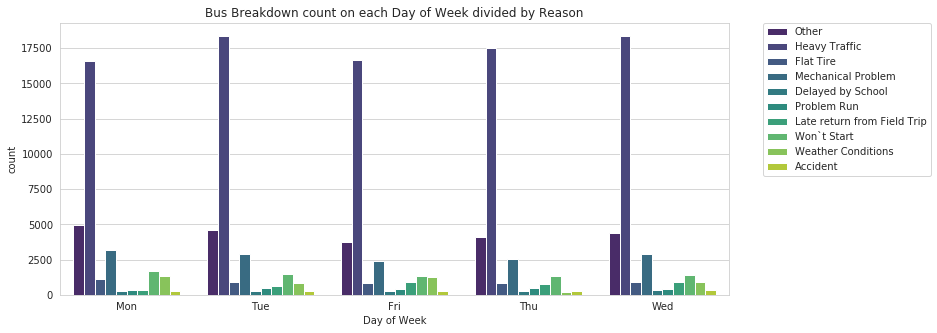

In [87]:

plt.figure(figsize=(12, 5))
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Bus Breakdown count on each Day of Week divided by Reason')

Text(0.5,1,'Bus Breakdown count on each Month divided by Reason')

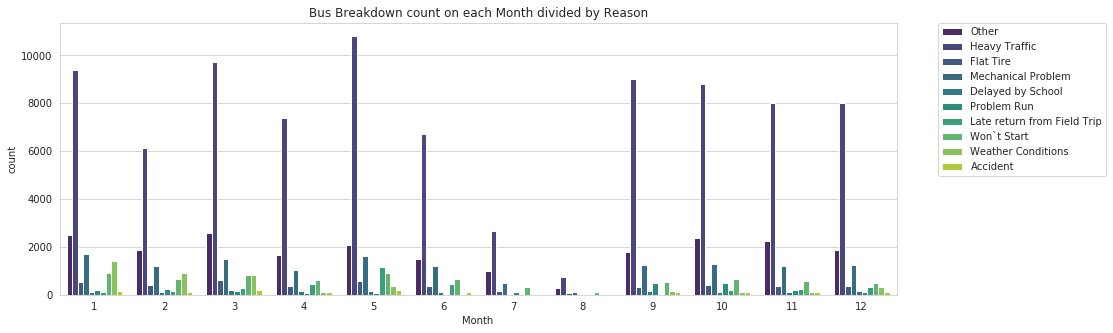

In [98]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Bus Breakdown count on each Month divided by Reason')

# Total count of breakdown divided into months

In [99]:
byMonth = df.groupby('Month').count()
byMonth.head()

,School_Year,Busbreakdown_ID,Reason,Occurred_On,timeStamp,Hour,Day of Week,Date
Month,,,,,,,,
1,17058,17058,17058,17058,17058,17058,17058,17058
2,11815,11815,11815,11815,11815,11815,11815,11815
3,16896,16896,16896,16896,16896,16896,16896,16896
4,11999,11999,11999,11999,11999,11999,11999,11999
5,18025,18025,18025,18025,18025,18025,18025,18025


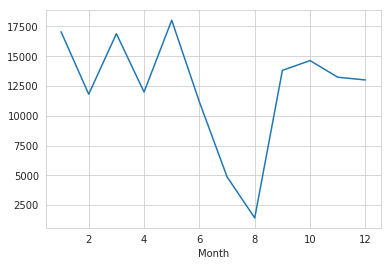

In [100]:
byMonth['timeStamp'].plot()

# Linear fit of count of breakdown vs Month

/home/anees/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


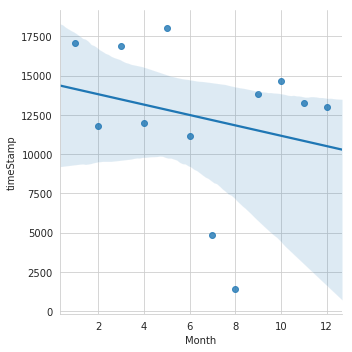

In [54]:
sns.lmplot(x='Month',y='timeStamp',data=byMonth.reset_index())

# Time Series Data of count of breakdown per day

In [55]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

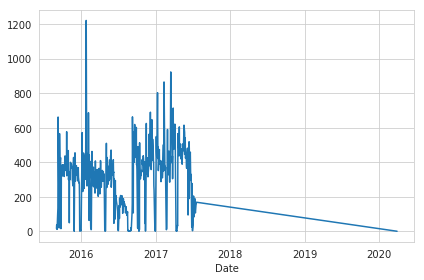

In [59]:
df.groupby('Date').count()['timeStamp'].plot()
plt.tight_layout()

# Time Series Data of count of  Heavy Traffic breakdown per day

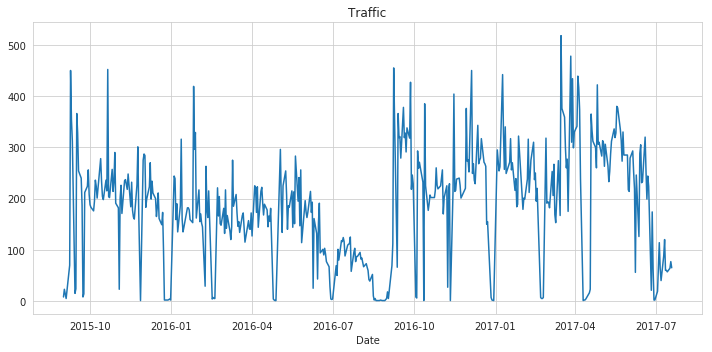

In [65]:
plt.figure(figsize=(10, 5))
df[df['Reason']=='Heavy Traffic'].groupby('Date').count()['timeStamp'].plot()
plt.title('Traffic')
plt.tight_layout()

# Unstacking count of breakdown with hour and day of week 

In [66]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,7.0,27.0,49.0,16.0,7.0,326.0,7072.0,11021.0,2776.0,214.0,...,3285.0,887.0,307.0,65.0,11.0,15.0,2.0,2.0,1.0,12.0
Mon,1.0,13.0,46.0,19.0,6.0,538.0,8449.0,12469.0,3264.0,219.0,...,2700.0,833.0,267.0,83.0,19.0,18.0,3.0,3.0,NaN,2.0
Thu,5.0,18.0,35.0,19.0,3.0,326.0,6809.0,11534.0,3306.0,261.0,...,2947.0,987.0,426.0,99.0,18.0,10.0,13.0,4.0,3.0,8.0
Tue,5.0,17.0,35.0,20.0,3.0,374.0,7899.0,12805.0,3634.0,235.0,...,2770.0,905.0,385.0,95.0,27.0,14.0,5.0,3.0,1.0,4.0
Wed,7.0,23.0,52.0,17.0,4.0,435.0,7786.0,12523.0,3408.0,269.0,...,3061.0,981.0,389.0,112.0,24.0,16.0,4.0,3.0,2.0,4.0


# Heatmap of breakdown separated by each hour

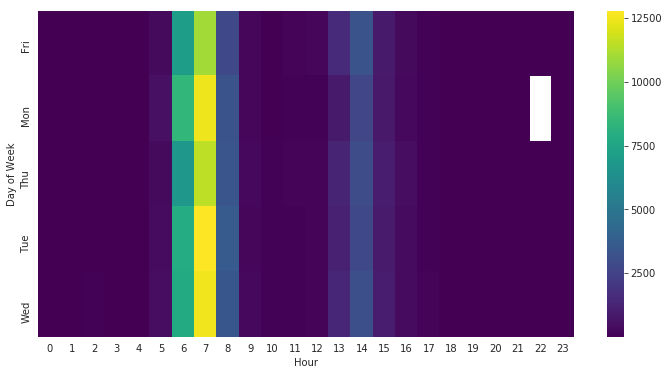

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

# Heatmap of breakdown separated by each month¶

In [69]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,2640,2949,2906,2482,3378,2453,755,204,2956,3221,1648,2465
Mon,3650,2837,3610,2145,3546,2129,944,420,2026,2306,3555,2830
Thu,2967,1588,3673,2474,3368,1984,1007,232,3066,3503,2017,2539
Tue,4671,2350,2611,2130,4254,2208,1083,293,2640,2559,3246,2660
Wed,3130,2091,4096,2768,3479,2396,1087,278,3127,3050,2775,2517


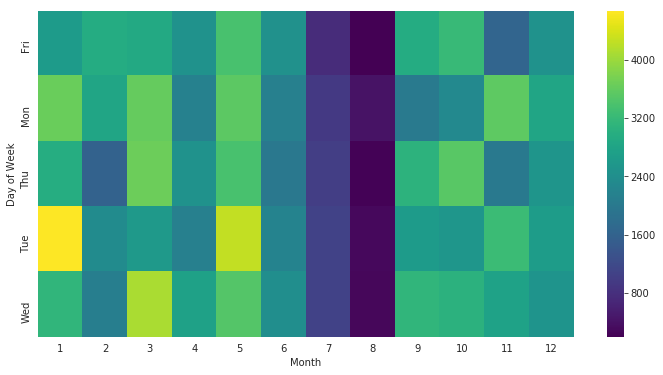

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

# Conclusion

The heatmap visualisation gives an idea about the time of breakdown of the buses. Most bus breakdown are from 8 am to 10 am and 12pm to 2 pm. This matches with usual US school timings. Most time delay is casued by Heavy traffic.  